<ipython-input-14-dd856bf46a88>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))


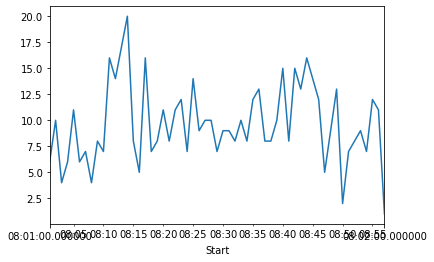

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

aggregates = pd.read_csv('data/aggregates.csv')
aggregates.columns = ['TagName', 'Count', 'Start']
aggregates_paris = aggregates[aggregates['TagName'] == 'Paris']
aggregates_paris.set_index('Start', inplace=True)
aggregates_paris.set_index(pd.to_datetime(aggregates_paris.index), inplace=True)
aggregates_paris.head()

ax = aggregates_paris['Count'].plot()
ticklabels = aggregates_paris.index.strftime('%H:%M:%S.%f')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.show()

In [31]:
# train/test split
aggregates2 = pd.read_csv('data/aggregates.csv', parse_dates=True)
aggregates2.columns = ['TagName', 'Count', 'Start']
aggregates2 = aggregates2.drop(['TagName', 'Start'], axis=1)
X = aggregates2.values
#train = aggregates_paris[aggregates_paris.index <= pd.to_datetime("2022-06-10 08:52:00.000", format='%Y-%m-%d %H:%M:%S.%f')]
#test = aggregates_paris[aggregates_paris.index > pd.to_datetime("2022-06-10 08:52:00.000", format='%Y-%m-%d %H:%M:%S.%f')]
train = X[1:len(X)-5]
test = X[len(X)-5:]
test

array([[ 6],
       [11],
       [11],
       [ 1],
       [ 3]], dtype=int64)

predicted=8.864965, expected=6.000000
predicted=7.029339, expected=11.000000
predicted=10.768580, expected=11.000000
predicted=7.680178, expected=1.000000
predicted=7.847066, expected=3.000000
Test RMSE: 4.293


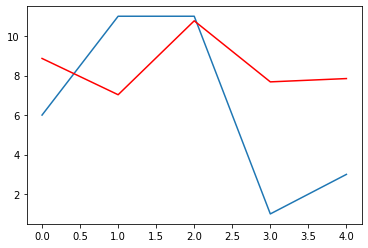

In [34]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# Autoregression basierend auf den letzten 15 Minuten
window = 30
model = AutoReg(train, lags=window)
model_fit = model.fit()

# Testing
coef = model_fit.params
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [35]:
# Modell exportieren (pkl)
import pickle
pickle_out = open("data/autoregression.pkl", mode = "wb") 
pickle.dump(model_fit, pickle_out) 
pickle_out.close()